In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
#from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Input,concatenate, AveragePooling2D
import cv2
#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#from keras.models import Sequential
#from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
#from keras.preprocessing.image import ImageDataGenerator
#from keras.models import load_model
from sklearn.cluster import KMeans
import imutils
from skimage.feature import hog
import glob
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
root_path = 'D:\\CS231\\FinalProject'
root_list = os.listdir(root_path)
train_path = os.path.join(root_path, 'train')
test_path = os.path.join(root_path, 'test')

In [3]:
X_train = []
y_train = []
X_test = []
y_test = []

In [4]:
for index, image_dir in enumerate(os.listdir(train_path)):
    label = index
    image_dir_path = os.path.join(train_path, image_dir)
    image_paths = glob.glob(os.path.join(image_dir_path, "*.jpg"))
    
    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is not None:
            img_GRAY = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            img_GRAY = cv2.resize(img_GRAY,(128,128))

            hog_feature, hog_image = hog(img_GRAY, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=True)
            
            X_train.append(hog_feature)
            y_train.append(label)

for index, image_dir in enumerate(os.listdir(test_path)):
    label = index
    image_dir_path = os.path.join(test_path, image_dir)
    image_paths = glob.glob(os.path.join(image_dir_path, "*.jpg"))
    
    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is not None:
            img_GRAY = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            img_GRAY = cv2.resize(img_GRAY,(128,128))

            hog_feature, hog_image = hog(img_GRAY, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=True)
            
            X_test.append(hog_feature)
            y_test.append(label)

In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

Mean Accuracy: 0.781064049332973
Parameters: {'n_neighbors': 1}


Mean Accuracy: 0.7721445593690883
Parameters: {'n_neighbors': 2}


Mean Accuracy: 0.8206876642999287
Parameters: {'n_neighbors': 3}


Mean Accuracy: 0.8276109869051421
Parameters: {'n_neighbors': 4}


Mean Accuracy: 0.8395032307200943
Parameters: {'n_neighbors': 5}


Mean Accuracy: 0.8504016902930989
Parameters: {'n_neighbors': 6}


Mean Accuracy: 0.8494165049259268
Parameters: {'n_neighbors': 7}


Mean Accuracy: 0.8508979682087314
Parameters: {'n_neighbors': 8}


Mean Accuracy: 0.855358327396015
Parameters: {'n_neighbors': 9}


Mean Accuracy: 0.8523892587769943
Parameters: {'n_neighbors': 10}


Mean Accuracy: 0.8553595558066973
Parameters: {'n_neighbors': 11}


Mean Accuracy: 0.852383116723583
Parameters: {'n_neighbors': 12}


Mean Accuracy: 0.8504102891678746
Parameters: {'n_neighbors': 13}


Mean Accuracy: 0.8508979682087314
Parameters: {'n_neighbors': 14}


Mean Accuracy: 0.8563471979952337
Parameters: {'n_neighbors'

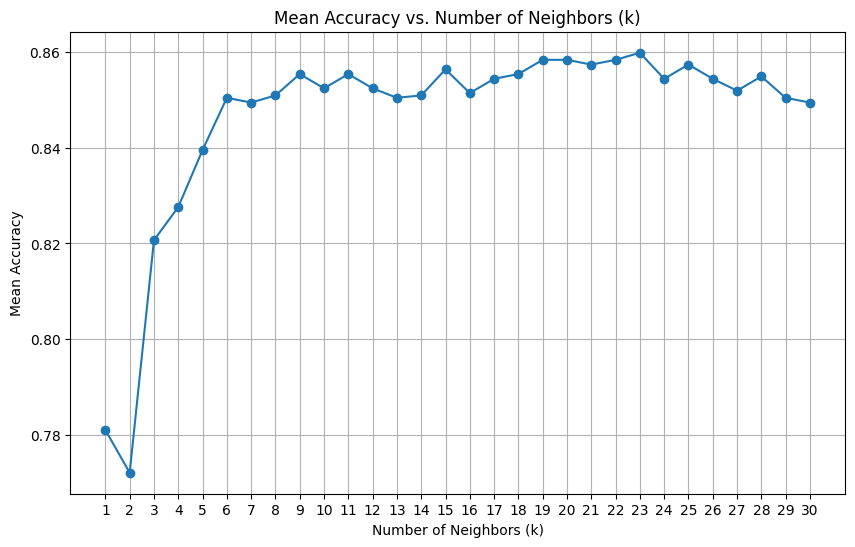

In [6]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

knn_classifier = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 31)}

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

grid_search = GridSearchCV(knn_classifier, param_grid, cv=kf)

grid_search.fit(X_train, y_train)

results = grid_search.cv_results_

for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("Mean Accuracy:", mean_score)
    print("Parameters:", params)
    print("\n")

best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

k_values = [params['n_neighbors'] for params in results['params']]
mean_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title('Mean Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [7]:
import joblib
joblib.dump(best_model, 'kNN_model_HOG.pkl')

['kNN_model_HOG.pkl']